# Análise de Componentes Principais 

*Principal Component Analisys* (PCA)

***

PCA é uma técnica de redução de dimensionalidade não supervisionada bem conhecida que constrói features relevantes por meio de combinações lineares (PCA lineares) ou não lineares (kernel PCA) das variáveis originais (features).

In [11]:
# importando as bibliotecas 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report 

import warnings
warnings.filterwarnings('ignore')

## Análise do conjunto de dados

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/Francimaria/especializacao_DNN/main/datasets/breast_cancer_wisconsin_diagnostic.csv')

In [3]:
X = dataset.drop([dataset.columns[0]], axis = 1)
y = dataset[dataset.columns[0]]

print("Número de atributos (features): ",X.shape[1])
print("\nNome dos atributos:", X.columns)

Número de atributos (features):  30

Nome dos atributos: Index(['radius_Mean', 'texture_Mean', 'periMeter_Mean', 'area_Mean',
       'sMoothness_Mean', 'coMpactness_Mean', 'concavity_Mean',
       'concave points_Mean', 'syMMetry_Mean', 'fractal_diMension_Mean',
       'radius_se', 'texture_se', 'periMeter_se', 'area_se', 'sMoothness_se',
       'coMpactness_se', 'concavity_se', 'concave points_se', 'syMMetry_se',
       'fractal_diMension_se', 'radius_worst', 'texture_worst',
       'periMeter_worst', 'area_worst', 'sMoothness_worst',
       'coMpactness_worst', 'concavity_worst', 'concave points_worst',
       'syMMetry_worst', 'fractal_diMension_worst'],
      dtype='object')


In [4]:
dataset.describe()

,radius_Mean,texture_Mean,periMeter_Mean,area_Mean,sMoothness_Mean,coMpactness_Mean,concavity_Mean,concave points_Mean,syMMetry_Mean,fractal_diMension_Mean,...,radius_worst,texture_worst,periMeter_worst,area_worst,sMoothness_worst,coMpactness_worst,concavity_worst,concave points_worst,syMMetry_worst,fractal_diMension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## PCA 

Antes de aplicar o PCA algumas particularidades precisam ser observadas:

1 - Para implementar o PCA é essencial padronizar/normalizar os dados antes de aplicar o PCA.  O PCA trabalha sob a suposição de que os dados são distribuídos normalmente e é muito sensível à variância das variáveis. 

2 - Precisamos definir o número de componentes 'n_components'.

3 - Geralmente, 'n_components' é escolhido com $2$ para melhor visualização dos dados, mas essa escolha depende da aplicação nos dados.


In [5]:
# Vamos utilizar o método StandardScaler antes de aplicar o PCA 
scaling = StandardScaler()
 
# Use o  método fit_transform para transformar os dados 
X_ss = scaling.fit_transform(X)

# Ajuste o número de componentes para 2 n_components=2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_ss)
 
# Vamos obrservar as dimensões após o PCA
print(X_pca.shape)

(569, 2)


Text(0, 0.5, 'pc2')

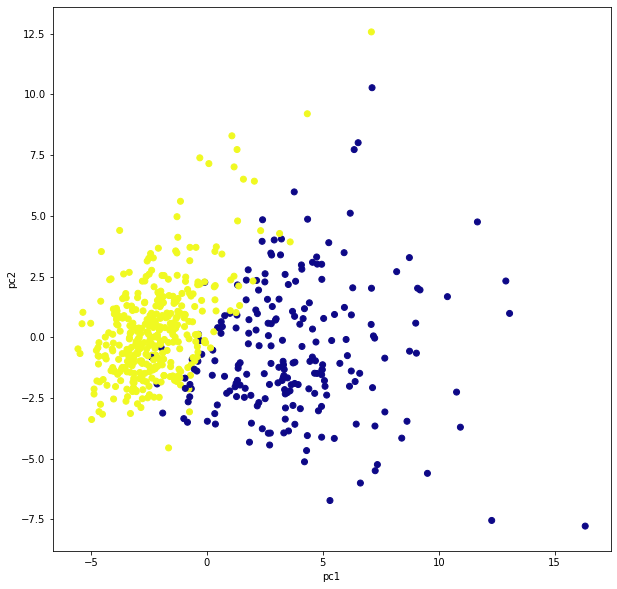

In [6]:
target = pd.factorize(y)[0]
# vamos visualizar os dados em 2d
plt.figure(figsize=(10,10))
plt.scatter(X_pca[:,0],X_pca[:,1],c=target,cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')

## Como utilizar como pre-processamento para classificação

In [7]:
# Separando o conjunto de dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [8]:
# Vamos utilizar o método StandardScaler antes de aplicar o PCA 
scaling = StandardScaler()
 
# Use o  método fit e transform para transformar os dados 
scaling.fit(X_train)

X_train_ss = scaling.transform(X_train)
X_test_ss = scaling.transform(X_test)

# Ajuste o número de componentes como 10 
pca = PCA(n_components=10)
pca.fit(X_train_ss)

X_train_pca = pca.transform(X_train_ss)
X_test_pca = pca.transform(X_test_ss)
 
# Vamos obrservar as dimensões após o PCA
print(X_train_pca.shape)

# definir um modelo
model = KNeighborsClassifier()

model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)

print(classification_report(y_test, y_pred))

(398, 10)
              precision    recall  f1-score   support

           B       0.94      1.00      0.97       107
           M       1.00      0.89      0.94        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



## Pipeline

In [10]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaling', StandardScaler()), 
                 ('pca', PCA(n_components=10)),
                 ('knn', KNeighborsClassifier())])

pipe.fit(X_train, y_train)
print("Steps:", pipe.steps)
print("Score: %.3f" %pipe.score(X_test, y_test))

Steps: [('scaling', StandardScaler()), ('pca', PCA(n_components=10)), ('knn', KNeighborsClassifier())]
Score: 0.959


**Vamos preparar um gridsearch de um pipeline**

In [14]:
# O nosso modelo agora é o pipeline
model =  Pipeline([('scaling', StandardScaler()), 
                 ('pca', PCA()),
                 ('knn', KNeighborsClassifier())])

# Nos parâmetros precisamos especificar a qual etapa ele pertence (nome__) * Obs.: são dois underlines (__)
parameters = {'pca__n_components': [10, 5],
              'knn__n_neighbors': [11, 9, 7, 5, 3, 1],
              'knn__metric':["euclidean", "manhattan"]}

grid = GridSearchCV(estimator = model,             # k-nn
                    param_grid = parameters,       # dicionário com valores para serem testados.
                    scoring = 'f1_macro',          # métrica de avaliação
                    cv = 5)                        # cross-validation

grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)

print("Melhor parametro:", grid.best_params_)         
# e ver a sua performance no dataset de teste
print(classification_report(y_test, grid.predict(X_test)))

Melhor parametro: {'knn__metric': 'manhattan', 'knn__n_neighbors': 5, 'pca__n_components': 5}
              precision    recall  f1-score   support

           B       0.94      0.98      0.96       107
           M       0.97      0.89      0.93        64

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



# Avalie agora utilizando o SVM

In [ ]:
# Lembre de realizar o import


#Defina o modelo utilizado

# Especifique os parâmetros utilizados 
